
#LogisticRegression with GridSearchCV




In [22]:
#Loading libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
#Load the iris dataset and make it yes/no question(setosa or not setosa)
data=load_iris()
x,y=data.data,(data.target==0).astype(int) #1=setosa, 0=no setosa


In [24]:
#splitting data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
#Setup model
model=LogisticRegression(solver='liblinear')

In [26]:
#List parameters
params={
    'C':[0.001,0.1,1,10],
    'penalty':['l1','l2']
}

In [27]:
#Setup GridSearch CV
grid=GridSearchCV(model,params,cv=5,scoring='accuracy')


In [28]:
#Train the model
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [29]:
#Best setting example
print(f'Best setting:{grid.best_params_}')

Best setting:{'C': 0.1, 'penalty': 'l1'}


In [30]:
#accuracy test
y_pred=grid.predict(x_test)
print(f'Accuracy:{accuracy_score(y_test,y_pred)}')

Accuracy:1.0


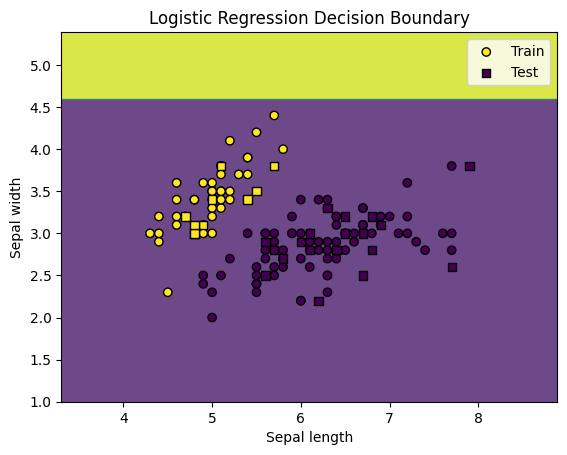

In [31]:
# Predict the class for each point in the meshgrid using the best fitted model from GridSearchCV
# The model was trained on 4 features, but the meshgrid is only for the first 2 features.
# To predict, we need to provide 4 features. We can fix the other 2 features to their mean from the training data.
mean_features = np.mean(x_train[:, 2:], axis=0) # Calculate the mean of the 3rd and 4th features from the training data
# Create an array with the shape of the meshgrid, filled with the mean values for the 3rd and 4th features
other_features = np.full((xx.ravel().shape[0], 2), mean_features)
# Combine the meshgrid points for the first two features with the fixed mean values for the other features
X_meshgrid = np.c_[xx.ravel(), yy.ravel(), other_features]

Z = grid.best_estimator_.predict(X_meshgrid)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train,
            edgecolors='k', marker='o', label='Train')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors
            ='k', marker='s', label='Test')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()



In [32]:
#inferencing on test data
# The new_data needs to have the same number of features as the training data (4).
# Since the model was trained on 4 features, the new data point must also have 4 features.
# Let's assume you want to predict for a new data point with sepal length 9.1 and sepal width 3.5.
# You need to provide values for petal length and petal width as well.
# For demonstration purposes, let's use the mean of the petal length and petal width from the training data.
mean_petal_features = np.mean(x_train[:, 2:], axis=0)
new_data = np.array([[9.1, 3.5, mean_petal_features[0], mean_petal_features[1]]])

predicted_class=grid.best_estimator_.predict(new_data) # Use the best estimator from GridSearchCV
class_name=data.target_names[predicted_class[0]] # Use 'data' from the loaded iris dataset
print(f'Predicted class: {class_name} ({predicted_class[0]})')



Predicted class: setosa (0)


In [33]:
# You also need to import confusion_matrix and ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [34]:
cm=confusion_matrix(y_test,y_pred)


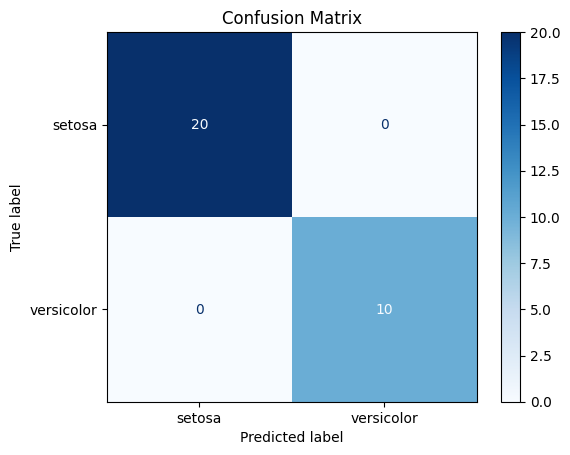

In [35]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=data.target_names[:2]) # Use 'data'
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()